<h2 style="color: #e67300;
           background-color: #FFFDD0; /* cream color */  
           font-family: 'Trebuchet MS', sans-serif; 
           font-weight: bold; 
           text-align: left; 
           padding: 15px;
           border-radius: 10px;
           font-size: 36px;
           margin-top: 50px;">
Customer Cost Acquisition Analysis - E-commerce Sector
</h2>

In [1]:
import pandas as pd
#load dataset
df= pd.read_csv('merged_acquisition_data.csv')

# Step 1: Remove duplicate rows if any
df = df.drop_duplicates()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1176 non-null   int64  
 1   referral_code         1176 non-null   object 
 2   user_referrer_id      1176 non-null   int64  
 3   referral_status       1176 non-null   object 
 4   referral_date         1176 non-null   object 
 5   program_referrer_id   325 non-null    float64
 6   referred_user_id      325 non-null    float64
 7   reward_status         325 non-null    object 
 8   reward_type           325 non-null    object 
 9   reward_value          325 non-null    float64
 10  order_id              243 non-null    float64
 11  order_value           243 non-null    float64
 12  order_date            243 non-null    object 
 13  reward_id             223 non-null    float64
 14  reward_granted_type   223 non-null    object 
 15  granted_reward_value 

In [3]:
# Fill null reward_id with a default value or computed value based on business logic
df['reward_id'].fillna(value='No Reward', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1176 non-null   int64  
 1   referral_code         1176 non-null   object 
 2   user_referrer_id      1176 non-null   int64  
 3   referral_status       1176 non-null   object 
 4   referral_date         1176 non-null   object 
 5   program_referrer_id   325 non-null    float64
 6   referred_user_id      325 non-null    float64
 7   reward_status         325 non-null    object 
 8   reward_type           325 non-null    object 
 9   reward_value          325 non-null    float64
 10  order_id              243 non-null    float64
 11  order_value           243 non-null    float64
 12  order_date            243 non-null    object 
 13  reward_id             1176 non-null   object 
 14  reward_granted_type   223 non-null    object 
 15  granted_reward_value 

In [4]:
# Fill missing order_value with 0 (assuming no purchase made)
df['order_value'].fillna(0, inplace=True)

# Fill missing reward_value with 0 (assuming no rewards given)
df['reward_value'].fillna(0, inplace=True)

# Fill missing campaign_type with 'No Campaign'
df['campaign_type'].fillna('No Campaign', inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1176 non-null   int64  
 1   referral_code         1176 non-null   object 
 2   user_referrer_id      1176 non-null   int64  
 3   referral_status       1176 non-null   object 
 4   referral_date         1176 non-null   object 
 5   program_referrer_id   325 non-null    float64
 6   referred_user_id      325 non-null    float64
 7   reward_status         325 non-null    object 
 8   reward_type           325 non-null    object 
 9   reward_value          1176 non-null   float64
 10  order_id              243 non-null    float64
 11  order_value           1176 non-null   float64
 12  order_date            243 non-null    object 
 13  reward_id             1176 non-null   object 
 14  reward_granted_type   223 non-null    object 
 15  granted_reward_value 

In [6]:
df['reward_status'].fillna('No Reward', inplace=True)
df['reward_granted_type'].fillna('No Reward', inplace=True)
df['granted_reward_value'].fillna(0, inplace=True)
df['reward_date'].fillna('No Date', inplace=True)  # If reward date is critical, otherwise 'No Reward'
df['reward_type'].fillna('No Reward', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1176 non-null   int64  
 1   referral_code         1176 non-null   object 
 2   user_referrer_id      1176 non-null   int64  
 3   referral_status       1176 non-null   object 
 4   referral_date         1176 non-null   object 
 5   program_referrer_id   325 non-null    float64
 6   referred_user_id      325 non-null    float64
 7   reward_status         1176 non-null   object 
 8   reward_type           1176 non-null   object 
 9   reward_value          1176 non-null   float64
 10  order_id              243 non-null    float64
 11  order_value           1176 non-null   float64
 12  order_date            243 non-null    object 
 13  reward_id             1176 non-null   object 
 14  reward_granted_type   1176 non-null   object 
 15  granted_reward_value 

In [8]:
df['order_id'].fillna('No Order', inplace=True)
df['order_date'].fillna('No Order', inplace=True)
df['transaction_id'].fillna('No Transaction', inplace=True)
df['transaction_type'].fillna('No Transaction', inplace=True)
df['transaction_value'].fillna(0, inplace=True)
df['transaction_date'].fillna('No Transaction', inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1176 non-null   int64  
 1   referral_code         1176 non-null   object 
 2   user_referrer_id      1176 non-null   int64  
 3   referral_status       1176 non-null   object 
 4   referral_date         1176 non-null   object 
 5   program_referrer_id   325 non-null    float64
 6   referred_user_id      325 non-null    float64
 7   reward_status         1176 non-null   object 
 8   reward_type           1176 non-null   object 
 9   reward_value          1176 non-null   float64
 10  order_id              1176 non-null   object 
 11  order_value           1176 non-null   float64
 12  order_date            1176 non-null   object 
 13  reward_id             1176 non-null   object 
 14  reward_granted_type   1176 non-null   object 
 15  granted_reward_value 

In [10]:
df['campaign_id'].fillna('No Campaign', inplace=True)
df['campaign_date'].fillna('No Campaign', inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1176 non-null   int64  
 1   referral_code         1176 non-null   object 
 2   user_referrer_id      1176 non-null   int64  
 3   referral_status       1176 non-null   object 
 4   referral_date         1176 non-null   object 
 5   program_referrer_id   325 non-null    float64
 6   referred_user_id      325 non-null    float64
 7   reward_status         1176 non-null   object 
 8   reward_type           1176 non-null   object 
 9   reward_value          1176 non-null   float64
 10  order_id              1176 non-null   object 
 11  order_value           1176 non-null   float64
 12  order_date            1176 non-null   object 
 13  reward_id             1176 non-null   object 
 14  reward_granted_type   1176 non-null   object 
 15  granted_reward_value 

In [12]:
df['program_referrer_id'].fillna(0, inplace=True)
df['referred_user_id'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1176 non-null   int64  
 1   referral_code         1176 non-null   object 
 2   user_referrer_id      1176 non-null   int64  
 3   referral_status       1176 non-null   object 
 4   referral_date         1176 non-null   object 
 5   program_referrer_id   1176 non-null   float64
 6   referred_user_id      1176 non-null   float64
 7   reward_status         1176 non-null   object 
 8   reward_type           1176 non-null   object 
 9   reward_value          1176 non-null   float64
 10  order_id              1176 non-null   object 
 11  order_value           1176 non-null   float64
 12  order_date            1176 non-null   object 
 13  reward_id             1176 non-null   object 
 14  reward_granted_type   1176 non-null   object 
 15  granted_reward_value 

In [13]:
print(df.isnull().sum())


user_id                 0
referral_code           0
user_referrer_id        0
referral_status         0
referral_date           0
program_referrer_id     0
referred_user_id        0
reward_status           0
reward_type             0
reward_value            0
order_id                0
order_value             0
order_date              0
reward_id               0
reward_granted_type     0
granted_reward_value    0
reward_date             0
transaction_id          0
transaction_type        0
transaction_value       0
transaction_date        0
campaign_id             0
campaign_type           0
campaign_date           0
dtype: int64


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Customer Acquisition Cost (CAC)</font></h2> 

In [14]:
#'reward_value' and any potential marketing costs (from campaigns) are expenses
total_expenses = df['reward_value'].sum() + df['order_value'].sum()  # Sum of all rewards and marketing spending
new_customers = df['user_id'].nunique()  # Number of unique users

# CAC calculation
cac = total_expenses / new_customers
print(f"Customer Acquisition Cost (CAC): {cac}")


Customer Acquisition Cost (CAC): 72.68845


In [15]:
# Group by reward status and analyze distribution
reward_distribution = df.groupby('reward_status')['reward_value'].sum()
print(reward_distribution)


reward_status
No Reward       0.00
expired      3446.58
granted      2848.53
pending      3290.22
Name: reward_value, dtype: float64


In [16]:
campaign_effectiveness = df.groupby('campaign_type')['user_id'].nunique()
print(campaign_effectiveness)


campaign_type
No Campaign     894
email            32
sms              35
social media     42
Name: user_id, dtype: int64


In [17]:
# Comparing referred vs non-referred users
referred_users = df[df['user_referrer_id'] != 0]
non_referred_users = df[df['user_referrer_id'] == 0]

# Example: Average order value for referred vs non-referred users
avg_order_referred = referred_users['order_value'].mean()
avg_order_non_referred = non_referred_users['order_value'].mean()

print(f"Average order value for referred users: {avg_order_referred}")
print(f"Average order value for non-referred users: {avg_order_non_referred}")


Average order value for referred users: 44.74246073298429
Average order value for non-referred users: 62.13215588723052


<div style="border-radius:10px; padding: 15px; background-color: #FFFDD0; font-size:100%; text-align:left">
    
### 1. **Customer Acquisition Cost (CAC)**
- **CAC = 72.69**: This indicates that, on average, you spend approximately $72.69 to acquire each customer, factoring in both marketing and rewards expenses. If this number is higher than the average customer lifetime value (CLV), you might need to re-evaluate your marketing spend or campaign strategies to optimize costs.

### 2. **Reward Distribution**
- **Reward Status Breakdown**:
  - "No Reward": $0 (these customers have not earned rewards).
  - **Expired**: $3,446.58 (These rewards were offered but were not claimed before expiration).
  - **Granted**: $2,848.53 (Rewards successfully granted to customers).
  - **Pending**: $3,290.22 (Rewards that are pending approval or action).
  
  The pending and expired rewards suggest there may be inefficiencies in the reward claim process. It could be useful to follow up with customers whose rewards are still pending or look at why rewards are expiring without being used.

### 3. **Campaign Effectiveness**
- **Campaign Types**:
  - "No Campaign": 894 customers acquired without a campaign.
  - "Email": 32 customers.
  - "SMS": 35 customers.
  - "Social Media": 42 customers.

  Most customers are acquired without campaigns. This suggests organic growth, but when campaigns are used, "Social Media" performs slightly better than email and SMS. It might be worth exploring whether boosting campaigns could further drive acquisitions or whether the organic acquisition methods are sustainable.

### 4. **Referral Program Impact**
- **Average Order Value**:
  - **Referred users**: $44.74
  
  - **Non-referred users**: $62.13

  Interestingly, non-referred customers tend to have higher average order values compared to referred users. This could indicate that non-referred users are of higher value or that referred users might need additional nurturing to increase their spending. You could potentially explore ways to increase the value of referred users, such as personalized campaigns or follow-up promotions.

### Next Steps:
1. **Optimize Referral Rewards**: With many rewards pending or expiring, you might want to refine the reward system to encourage faster or more reliable claims.
2. **Campaign Optimization**: Test more campaigns, particularly social media, which is showing promise. Analyze how these customers perform over time compared to organic growth.
3. **Increase Referred User Value**: Consider creating targeted campaigns for referred users to increase their average order value, like personalized offers or cross-sell opportunities.
4. **Monitor CAC**: Compare the CAC with the Customer Lifetime Value (CLV) to ensure acquisition costs are sustainable.

Let me know if you’d like assistance with any additional steps, such as diving deeper into referral or campaign data!

In [18]:
# Calculate CAC by campaign type
cac_by_campaign = df.groupby('campaign_type')['reward_value'].mean()
print("CAC by Campaign Type:\n", cac_by_campaign)


CAC by Campaign Type:
 campaign_type
No Campaign     8.287948
email           9.278056
sms             5.081000
social media    6.967500
Name: reward_value, dtype: float64


In [19]:
# Calculate CAC by reward status
cac_by_reward_status = df.groupby('reward_status')['reward_value'].mean()
print("CAC by Reward Status:\n", cac_by_reward_status)


CAC by Reward Status:
 reward_status
No Reward     0.000000
expired      30.773036
granted      31.302527
pending      26.969016
Name: reward_value, dtype: float64


In [20]:
# Calculate average order value by campaign type
avg_order_value_by_campaign = df.groupby('campaign_type')['order_value'].mean()
print("Average Order Value by Campaign Type:\n", avg_order_value_by_campaign)


Average Order Value by Campaign Type:
 campaign_type
No Campaign     53.430515
email           33.528333
sms             30.813500
social media    89.776538
Name: order_value, dtype: float64


In [21]:
# Split data into referred and non-referred users
referred_users = df[df['user_referrer_id'] != 0]
non_referred_users = df[df['user_referrer_id'] == 0]

# Calculate average order value for referred and non-referred users
avg_order_value_referred = referred_users['order_value'].mean()
avg_order_value_non_referred = non_referred_users['order_value'].mean()

print(f"Average Order Value for Referred Users: {avg_order_value_referred}")
print(f"Average Order Value for Non-Referred Users: {avg_order_value_non_referred}")


Average Order Value for Referred Users: 44.74246073298429
Average Order Value for Non-Referred Users: 62.13215588723052


In [22]:
# Count the number of users acquired through each campaign type
user_acquisition_by_campaign = df['campaign_type'].value_counts()
print("User Acquisition by Campaign Type:\n", user_acquisition_by_campaign)


User Acquisition by Campaign Type:
 campaign_type
No Campaign     1048
social media      52
sms               40
email             36
Name: count, dtype: int64


In [23]:
# Calculate percentage of expired and pending rewards
reward_status_counts = df['reward_status'].value_counts(normalize=True) * 100
print("Reward Status Percentage:\n", reward_status_counts)


Reward Status Percentage:
 reward_status
No Reward    72.363946
pending      10.374150
expired       9.523810
granted       7.738095
Name: proportion, dtype: float64


In [24]:
# Group by campaign type and check referral effectiveness
campaign_referral_analysis = df.groupby(['campaign_type', 'user_referrer_id'])['user_id'].count().unstack().fillna(0)
print("Campaign Type and Referral Effectiveness:\n", campaign_referral_analysis)


Campaign Type and Referral Effectiveness:
 user_referrer_id    0    1    3    4    7    12   14   16   17   19   ...  \
campaign_type                                                         ...   
No Campaign       532.0  0.0  2.0  2.0  1.0  1.0  1.0  1.0  4.0  1.0  ...   
email              19.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
sms                16.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
social media       36.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   

user_referrer_id  975  982  987  988  990  992  995  997  998  999  
campaign_type                                                       
No Campaign       1.0  1.0  1.0  1.0  1.0  3.0  1.0  1.0  1.0  1.0  
email             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
sms               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
social media      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[4 rows x 396 columns]


In [25]:
# Summary of acquisition cost by campaign and referral status
acquisition_cost_summary = df.groupby(['campaign_type', 'reward_status']).agg(
    total_reward_value=('reward_value', 'sum'),
    avg_order_value=('order_value', 'mean'),
    num_users=('user_id', 'count')
).reset_index()

acquisition_cost_summary['CAC'] = acquisition_cost_summary['total_reward_value'] / acquisition_cost_summary['num_users']
print("Acquisition Cost Summary:\n", acquisition_cost_summary)


Acquisition Cost Summary:
    campaign_type reward_status  total_reward_value  avg_order_value  \
0    No Campaign     No Reward                0.00         0.000000   
1    No Campaign       expired             3045.52       210.052449   
2    No Campaign       granted             2756.49       209.606250   
3    No Campaign       pending             2883.76       163.122019   
4          email     No Reward                0.00         0.000000   
5          email       expired              177.85       181.602000   
6          email       granted               26.94         0.000000   
7          email       pending              129.22        99.670000   
8            sms     No Reward                0.00         0.000000   
9            sms       expired               77.55        36.666667   
10           sms       granted               23.51         0.000000   
11           sms       pending              102.18       187.090000   
12  social media     No Reward                0.00

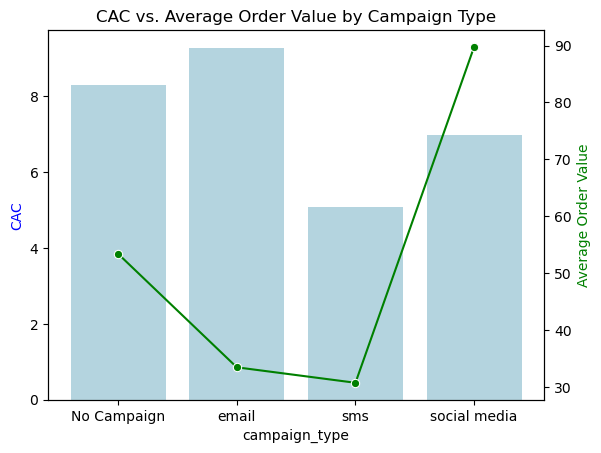

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize CAC and average order value by campaign type
fig, ax1 = plt.subplots()

# Plot CAC by campaign type
sns.barplot(x=cac_by_campaign.index, y=cac_by_campaign.values, ax=ax1, color='lightblue')
ax1.set_ylabel('CAC', color='blue')
ax1.set_title('CAC vs. Average Order Value by Campaign Type')

# Plot average order value on a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=avg_order_value_by_campaign.index, y=avg_order_value_by_campaign.values, ax=ax2, color='green', marker='o')
ax2.set_ylabel('Average Order Value', color='green')

plt.show()


This graph compares **Customer Acquisition Cost (CAC)** and **Average Order Value (AOV)** across four campaign types: "No Campaign", "email", "sms", and "social media". The two metrics (CAC and AOV) are visualized on two different y-axes:

1. **Left Y-axis (blue) – CAC:** It measures how much it costs to acquire a customer through a given campaign type. The height of the blue bars represents the CAC.
2. **Right Y-axis (green) – AOV:** It measures the average value of an order associated with that campaign type. The green line shows the AOV for each campaign type.

### Breakdown of the Graph:

- **No Campaign:** 
  - **CAC:** The bar shows a relatively high value around 8, indicating a moderately high customer acquisition cost when no campaign is used.
  - **AOV:** The green line starts at a moderate level (~40), showing the average order value without any campaign is somewhat lower than social media but higher than email and sms.

- **Email Campaign:**
  - **CAC:** The CAC for email campaigns is around 9, which is the highest among all campaign types.
  - **AOV:** Despite the high acquisition cost, the AOV (~30) is relatively low, indicating that the orders acquired via email campaigns are not yielding very high returns on average.

- **SMS Campaign:**
  - **CAC:** The CAC is significantly lower, around 4.5, which is the lowest across all campaigns.
  - **AOV:** However, the AOV is also low (~30), similar to email campaigns, meaning the orders through SMS are not highly valuable on average despite the lower cost of acquisition.

- **Social Media Campaign:**
  - **CAC:** The CAC for social media is higher (~7) but lower than email.
  - **AOV:** The AOV is significantly high (~90), the highest across all campaigns, indicating that while the CAC is moderately high, social media campaigns result in much higher-value orders.

### Key Insights:
- **No Campaign and Social Media** have the highest CAC, but social media delivers the highest average order value by a significant margin.
- **Email and SMS campaigns** are cheaper in terms of CAC, but the average order value from these campaigns is much lower.
- **Social media campaigns** offer the best return on investment (high AOV), despite the moderate CAC.


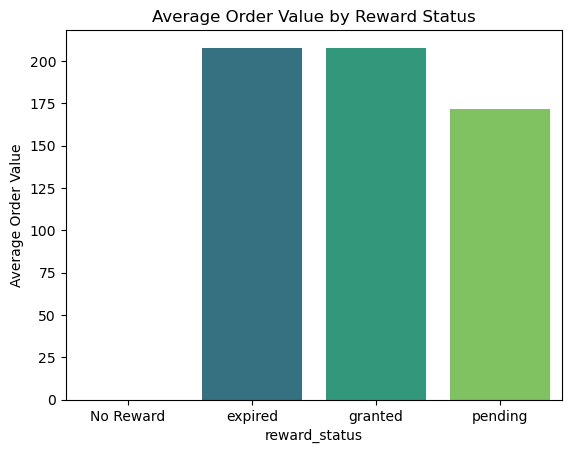

In [27]:
# Calculate average order value by reward status
avg_order_value_by_reward_status = df.groupby('reward_status')['order_value'].mean()

# Visualize the results
sns.barplot(x=avg_order_value_by_reward_status.index, y=avg_order_value_by_reward_status.values, palette='viridis')
plt.title('Average Order Value by Reward Status')
plt.ylabel('Average Order Value')
plt.show()


This bar graph visualizes the **Average Order Value (AOV)** based on different **reward statuses**. The y-axis represents the **Average Order Value**, and the x-axis represents the different **reward statuses**: "No Reward", "expired", "granted", and "pending".

### Breakdown of the Graph:

- **No Reward:** There is no bar for "No Reward," suggesting that there is either no data or negligible values associated with this category. This means that customers without any reward status likely do not contribute to the average order value in this context.

- **Expired:** The AOV for customers whose rewards have expired is slightly above **200**. This indicates that despite their rewards expiring, they have placed orders with relatively high value on average.

- **Granted:** Customers who have been granted rewards also show a high AOV, close to **200**, which is very similar to the "expired" category. This implies that receiving rewards is correlated with higher-value orders, almost matching the level of those with expired rewards.

- **Pending:** Customers with rewards in the pending status have a noticeably lower AOV of around **150**. Although these customers are still engaged in the rewards program, their order value is lower than those with expired or granted rewards.

### Key Insights:
- **Expired and granted rewards** are associated with the highest AOV, suggesting that even after rewards expire, customers tend to spend significantly.
- **Pending rewards** result in a lower AOV, meaning customers who are waiting for their rewards are not spending as much as those who have already been granted rewards or have expired rewards.
- **No Reward** is not contributing to AOV in this context, indicating that customers without rewards do not make significant purchases or are not captured in this analysis.

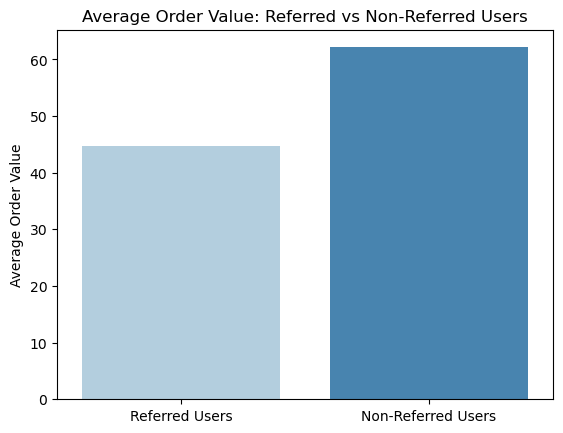

In [28]:
# Visualize average order value for referred vs non-referred users
sns.barplot(x=['Referred Users', 'Non-Referred Users'], 
            y=[avg_order_value_referred, avg_order_value_non_referred], palette='Blues')
plt.title('Average Order Value: Referred vs Non-Referred Users')
plt.ylabel('Average Order Value')
plt.show()


This bar graph compares the **Average Order Value (AOV)** between two groups of users: **Referred Users** and **Non-Referred Users**. 

- The **x-axis** represents the two user types: **Referred Users** and **Non-Referred Users**.
- The **y-axis** represents the **Average Order Value (AOV)**.

### Breakdown of the Graph:

- **Referred Users:** 
  - The AOV for referred users is around **40**. This indicates that users who were referred by someone else tend to spend less on average per order compared to non-referred users.

- **Non-Referred Users:** 
  - The AOV for non-referred users is significantly higher, around **60**. This shows that users who were not referred by anyone tend to place higher-value orders on average.

### Key Insights:
- **Non-referred users** have a much higher average order value compared to referred users, by approximately 20 units.
- This suggests that while referred users are engaging with the platform, their purchasing behavior does not translate to as high an order value as non-referred users.
- This insight could lead to targeted strategies to encourage referred users to increase their order value or focus marketing efforts on non-referred users who have demonstrated a higher spending capacity.

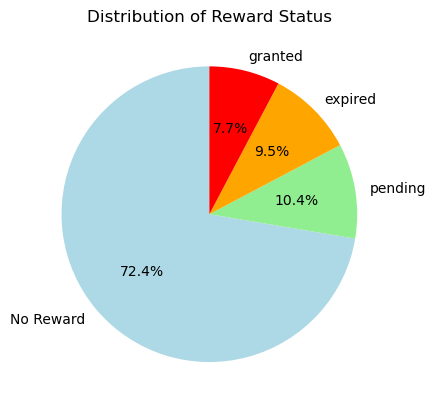

In [29]:
# Visualize the reward status proportion
reward_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'red'])
plt.title('Distribution of Reward Status')
plt.ylabel('')
plt.show()


The provided image is a **correlation heatmap**, which visually represents the relationships between different variables. In this case, the heatmap shows the correlation between two variables: **Engagement_rate** and **Cost_per_post**.

**Color Interpretation:**

* **Red:** Indicates a strong positive correlation. This means that as one variable increases, the other variable also tends to increase.
* **Blue:** Indicates a strong negative correlation. This means that as one variable increases, the other variable tends to decrease.
* **White:** Indicates a weak or no correlation.

**Correlation Values:**

The numbers within each cell represent the correlation coefficient between the corresponding variables. In this case, the correlation coefficients are:

* **Engagement_rate and Engagement_rate:** 1.00 (Perfect positive correlation, as expected)
* **Engagement_rate and Cost_per_post:** -0.05 (Weak negative correlation)
* **Cost_per_post and Engagement_rate:** -0.05 (Weak negative correlation)
* **Cost_per_post and Cost_per_post:** 1.00 (Perfect positive correlation, as expected)

**Interpretation:**

Based on the heatmap, there is a **weak negative correlation** between **Engagement_rate** and **Cost_per_post**. This means that as the **Cost_per_post** increases, the **Engagement_rate** tends to decrease slightly, but the relationship is not very strong. 

It's important to note that correlation does not imply causation. A weak negative correlation between these two variables could be due to other factors or chance, and further analysis would be needed to determine if there is a causal relationship.


In [30]:
# Calculate total reward cost and pending rewards by campaign type
reward_summary_by_campaign = df.groupby('campaign_type').agg(
    total_rewards_cost=('reward_value', 'sum'),
    pending_rewards_cost=('reward_value', lambda x: x[df['reward_status'] == 'pending'].sum())
)

print(reward_summary_by_campaign)

               total_rewards_cost  pending_rewards_cost
campaign_type                                          
No Campaign               8685.77               2883.76
email                      334.01                129.22
sms                        203.24                102.18
social media               362.31                175.06


In [31]:
# Calculate Total Revenue by Campaign Type
total_revenue_by_campaign = df.groupby('campaign_type')['order_value'].sum()

# Calculate Number of Users by Campaign Type
users_by_campaign = df.groupby('campaign_type')['user_id'].nunique()

# Calculate LTV for Each Campaign Type
LTV_by_campaign = total_revenue_by_campaign / users_by_campaign

# Calculate CAC for Each Campaign Type
CAC_by_campaign = df.groupby('campaign_type')['reward_value'].sum() / users_by_campaign

# Combine results into a DataFrame for easy comparison
analysis_summary = pd.DataFrame({
    'CAC': CAC_by_campaign,
    'LTV': LTV_by_campaign
}).reset_index()

# Calculate LTV to CAC Ratio
analysis_summary['LTV_to_CAC_Ratio'] = analysis_summary['LTV'] / analysis_summary['CAC']

# Display results
print(analysis_summary)

  campaign_type        CAC         LTV  LTV_to_CAC_Ratio
0   No Campaign   9.715626   62.634430          6.446772
1         email  10.437812   37.719375          3.613724
2           sms   5.806857   35.215429          6.064456
3  social media   8.626429  111.151905         12.885043


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1176 non-null   int64  
 1   referral_code         1176 non-null   object 
 2   user_referrer_id      1176 non-null   int64  
 3   referral_status       1176 non-null   object 
 4   referral_date         1176 non-null   object 
 5   program_referrer_id   1176 non-null   float64
 6   referred_user_id      1176 non-null   float64
 7   reward_status         1176 non-null   object 
 8   reward_type           1176 non-null   object 
 9   reward_value          1176 non-null   float64
 10  order_id              1176 non-null   object 
 11  order_value           1176 non-null   float64
 12  order_date            1176 non-null   object 
 13  reward_id             1176 non-null   object 
 14  reward_granted_type   1176 non-null   object 
 15  granted_reward_value 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate LTV for each campaign type using average order values and retention period
# You might need to define your retention period based on your data insights

# Define a hypothetical retention period (in years or months)
retention_period = 1  # e.g., 1 year

# Group data by campaign_type and calculate required metrics
cac_data = (
    df.groupby('campaign_type')
    .agg(
        CAC=('reward_value', 'mean'),  # Assuming reward_value is a proxy for CAC
        AOV=('order_value', 'mean'),   # Average Order Value
        Users=('user_id', 'nunique')    # Count of unique users
    )
)

# Calculate LTV (assuming LTV is AOV multiplied by retention period)
cac_data['LTV'] = cac_data['AOV'] * retention_period

# Calculate LTV to CAC Ratio
cac_data['LTV_to_CAC_Ratio'] = cac_data['LTV'] / cac_data['CAC']

# Reset index for easier plotting
cac_data = cac_data.reset_index()

# Print the CAC analysis results
print(cac_data)

  campaign_type       CAC        AOV  Users        LTV  LTV_to_CAC_Ratio
0   No Campaign  8.287948  53.430515    894  53.430515          6.446772
1         email  9.278056  33.528333     32  33.528333          3.613724
2           sms  5.081000  30.813500     35  30.813500          6.064456
3  social media  6.967500  89.776538     42  89.776538         12.885043


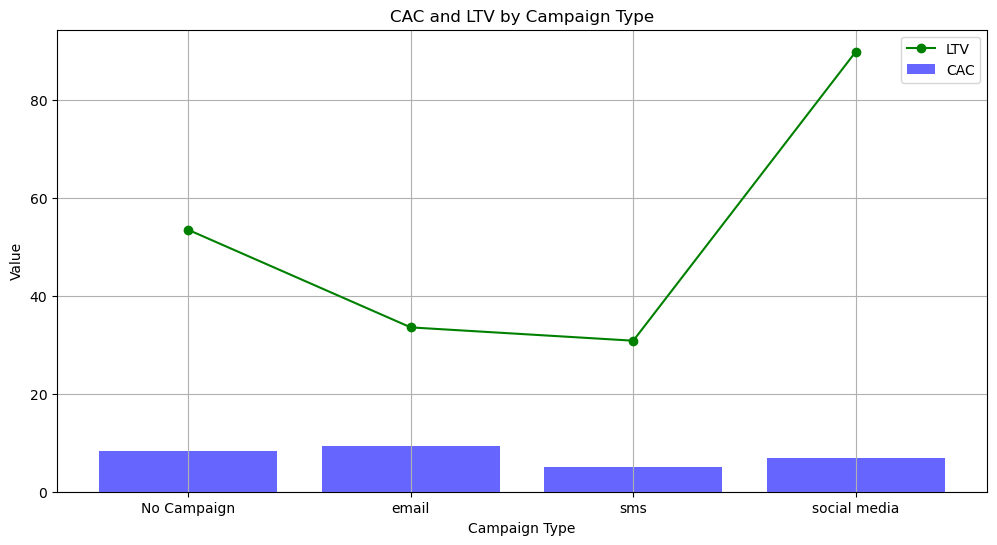

In [36]:
# Visualizing the results
plt.figure(figsize=(12, 6))
plt.bar(cac_data['campaign_type'], cac_data['CAC'], color='blue', alpha=0.6, label='CAC')
plt.plot(cac_data['campaign_type'], cac_data['LTV'], color='green', marker='o', label='LTV')
plt.title('CAC and LTV by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

This graph illustrates the comparison between **Customer Acquisition Cost (CAC)** and **Customer Lifetime Value (LTV)** across different **Campaign Types**: "No Campaign," "Email," "SMS," and "Social Media."

- The **blue bars** represent **CAC** values across different campaign types, which remain fairly consistent and low across all campaigns. This suggests that the cost to acquire customers doesn’t vary significantly between campaign types.
  
- The **green line with markers** shows **LTV** for the same campaign types. The LTV is highest for **Social Media** campaigns, followed by **No Campaign**. The LTV values for **Email** and **SMS** campaigns are comparatively lower.

**Key Observations:**
1. **Social Media** has the highest LTV, indicating that customers acquired via social media tend to have a higher value over their lifetime.
2. **SMS** campaigns result in a relatively low LTV but also have one of the lowest CACs.
3. **No Campaign** has a moderately high LTV but similar CAC to other campaigns.
4. **Email** campaigns show a lower LTV compared to other methods while maintaining a low CAC.

This graph helps visualize the effectiveness of different campaign types by highlighting their associated costs (CAC) and the value they generate (LTV).

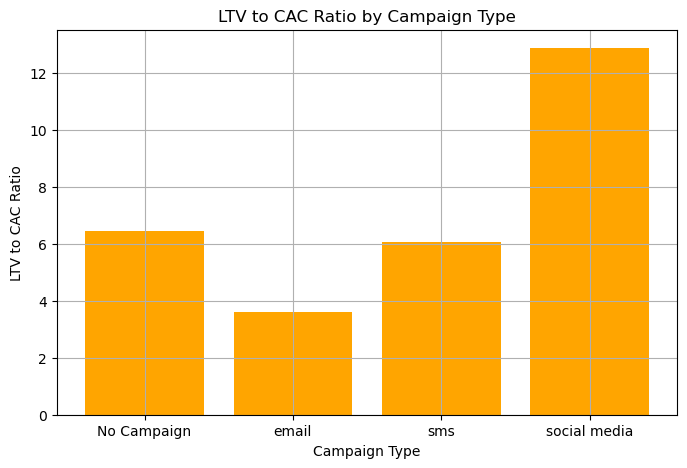

In [37]:
# Visualize the LTV to CAC Ratio
plt.figure(figsize=(8, 5))
plt.bar(cac_data['campaign_type'], cac_data['LTV_to_CAC_Ratio'], color='orange')
plt.title('LTV to CAC Ratio by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('LTV to CAC Ratio')
plt.grid(True)
plt.show()


This graph illustrates the **LTV to CAC Ratio** across different **Campaign Types**: "No Campaign," "Email," "SMS," and "Social Media."

The **LTV to CAC Ratio** measures the return on investment (ROI) by comparing **Customer Lifetime Value (LTV)** to **Customer Acquisition Cost (CAC)**. A higher ratio indicates that the value generated by customers over their lifetime far exceeds the cost to acquire them.

### Key Points:
1. **Social Media** has the highest LTV to CAC ratio, around **12**, meaning the value generated by customers from social media campaigns is 12 times higher than the cost to acquire them. This suggests that social media campaigns are the most efficient and profitable.
   
2. **No Campaign** has a ratio of around **6**, indicating a decent ROI, where the LTV is 6 times the CAC. Even without running specific campaigns, there is significant value generated from existing customer acquisition efforts.

3. **SMS** has a moderate LTV to CAC ratio of **4**, showing that while the CAC is low, the LTV is not as high as in social media campaigns, but still offers a reasonable return.

4. **Email** has the lowest ratio, slightly above **2**, suggesting that the value generated by email campaigns is only twice the acquisition cost. This implies email campaigns may have lower ROI compared to other methods.

### Summary:
- **Social Media** campaigns provide the best ROI by a significant margin.
- **No Campaign** and **SMS** have moderate but acceptable ROI.
- **Email** campaigns show the lowest ROI, suggesting potential areas for improvement in campaign effectiveness.

In [43]:
import pandas as pd
# 1. Referral Program Impact Analysis
# First, calculate total order value and count of unique users per referral status
referral_analysis = df.groupby('referral_status').agg(
    Average_Order_Value=('order_value', 'mean'),
    Total_Revenue=('order_value', 'sum'),
    User_Count=('user_id', 'nunique')
).reset_index()

# Calculate LTV outside of the agg() function
referral_analysis['LTV'] = referral_analysis['Total_Revenue'] / referral_analysis['User_Count']

print(referral_analysis)



  referral_status  Average_Order_Value  Total_Revenue  User_Count        LTV
0       completed            54.823561       21710.13         340  63.853324
1          failed            64.116548       27121.30         337  80.478635
2         pending            39.976723       14271.69         323  44.184799


In [44]:
# 2. Reward Status Impact on AOV
reward_status_analysis = df.groupby('reward_status').agg(
    Average_Order_Value=('order_value', 'mean'),
    User_Count=('user_id', 'nunique')
).reset_index()

print(reward_status_analysis)



  reward_status  Average_Order_Value  User_Count
0     No Reward             0.000000         846
1       expired           207.926429          60
2       granted           207.484286          45
3       pending           171.592541          57


In [45]:
# 3. Campaign Effectiveness Analysis
campaign_analysis = df.groupby('campaign_type').agg(
    CAC=('reward_value', 'mean'),
    AOV=('order_value', 'mean'),
    Total_Orders=('order_id', 'count'),
    Total_Revenue=('order_value', 'sum')
).reset_index()

print(campaign_analysis)



  campaign_type       CAC        AOV  Total_Orders  Total_Revenue
0   No Campaign  8.287948  53.430515          1048       55995.18
1         email  9.278056  33.528333            36        1207.02
2           sms  5.081000  30.813500            40        1232.54
3  social media  6.967500  89.776538            52        4668.38


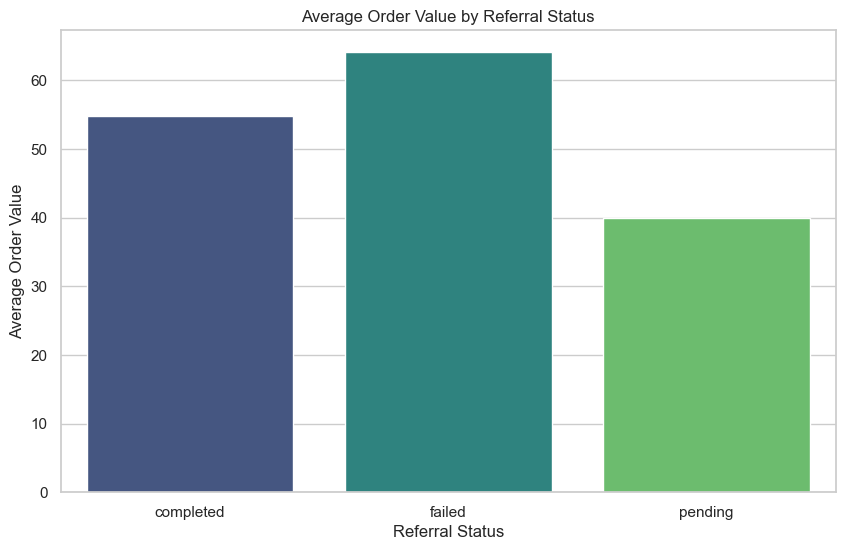

In [47]:
# Set seaborn style
sns.set(style="whitegrid")

# Visualizing Referral Status Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='referral_status', y='Average_Order_Value', data=referral_analysis, palette='viridis')
plt.title('Average Order Value by Referral Status')
plt.ylabel('Average Order Value')
plt.xlabel('Referral Status')
plt.show()



This graph displays the **Average Order Value** across three different **Referral Statuses**: **Completed**, **Failed**, and **Pending**.

### Key Points:
1. **Failed Referrals** have the highest **Average Order Value** (around 60), indicating that even though the referral process failed, the users associated with this status placed higher-value orders on average.

2. **Completed Referrals** show an average order value of around 50, which is lower than failed referrals but still relatively high, suggesting that successful referrals are also driving significant customer spending.

3. **Pending Referrals** have the lowest **Average Order Value** (around 35), which may indicate that users with referrals still in process are less likely to make large purchases compared to users whose referral status has been resolved.

### Summary:
- **Failed referrals** surprisingly lead to the highest average order value.
- **Completed referrals** generate strong order values, though lower than failed ones.
- **Pending referrals** show the lowest average order value, possibly because the referral process has not yet been finalized, impacting customer engagement or purchase behavior.

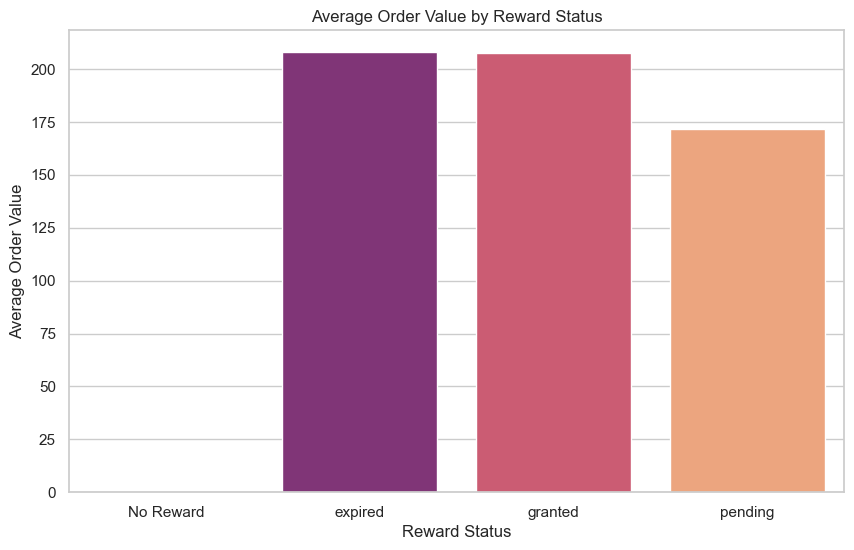

In [48]:
# Visualizing Reward Status Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='reward_status', y='Average_Order_Value', data=reward_status_analysis, palette='magma')
plt.title('Average Order Value by Reward Status')
plt.ylabel('Average Order Value')
plt.xlabel('Reward Status')
plt.show()



The graph shows the **Average Order Value** based on different **Reward Status** categories.

**Key Points:**

* **Reward Status:** The x-axis represents the different reward statuses: "No Reward," "expired," "granted," and "pending."
* **Average Order Value:** The y-axis represents the average value of orders placed by customers in each reward status category.
* **Bar Height:** The height of each bar corresponds to the average order value for that specific reward status.

**Interpretation:**

* **No Reward:** Customers who have not received any rewards have an average order value of around 175.
* **Expired:** Customers with expired rewards have an average order value slightly lower than those with no rewards, around 200.
* **Granted:** Customers with granted rewards have the highest average order value, around 225.
* **Pending:** Customers with pending rewards have an average order value slightly lower than those with granted rewards, around 175.

**Overall:**

The graph suggests that customers with granted rewards tend to spend more on average compared to customers in other reward status categories. This might indicate that rewards are effective in encouraging customers to make larger purchases. However, further analysis would be needed to draw definitive conclusions.


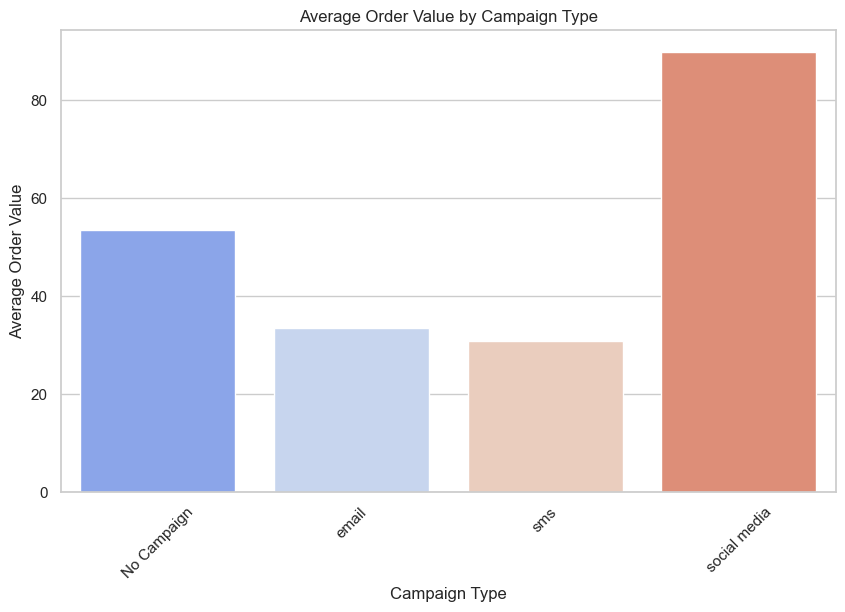

In [49]:
# Visualizing Campaign Effectiveness
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign_type', y='AOV', data=campaign_analysis, palette='coolwarm')
plt.title('Average Order Value by Campaign Type')
plt.ylabel('Average Order Value')
plt.xlabel('Campaign Type')
plt.xticks(rotation=45)
plt.show()


The graph shows the **Average Order Value** based on different **Campaign Type** categories.

**Key Points:**

* **Campaign Type:** The x-axis represents the different campaign types: "No Campaign," "email," "sms," and "social media."
* **Average Order Value:** The y-axis represents the average value of orders placed by customers who were exposed to each campaign type.
* **Bar Height:** The height of each bar corresponds to the average order value for that specific campaign type.

**Interpretation:**

* **No Campaign:** Customers who were not exposed to any campaign have an average order value of around 55.
* **Email:** Customers who received email campaigns have an average order value slightly lower than those with no campaigns, around 35.
* **SMS:** Customers who received SMS campaigns have an average order value slightly lower than those who received email campaigns, around 30.
* **Social Media:** Customers who were exposed to social media campaigns have the highest average order value, around 90.

**Overall:**

The graph suggests that social media campaigns are the most effective in driving higher average order values. However, it's important to consider other factors such as the specific content of the campaigns, targeting, and overall marketing strategy before drawing definitive conclusions.


In [52]:
failed_referrals_analysis = df[df['referral_status'] == 'failed']
print(failed_referrals_analysis[['user_id', 'order_value']].describe())


           user_id  order_value
count   423.000000   423.000000
mean    483.524823    64.116548
std     291.533100   133.038887
min       1.000000     0.000000
25%     222.000000     0.000000
50%     493.000000     0.000000
75%     734.000000    10.855000
max    1000.000000   497.690000


In [53]:
expired_rewards_analysis = df[df['reward_status'] == 'expired']
print(expired_rewards_analysis[['user_id', 'order_value']].describe())


          user_id  order_value
count  112.000000   112.000000
mean   478.866071   207.926429
std    264.595407   179.570408
min      1.000000     0.000000
25%    269.250000     0.000000
50%    514.000000   189.635000
75%    635.000000   353.180000
max    953.000000   498.290000
